# Analysing Alphine's Food Business

In [87]:
#Load library packages
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
#Load the files into the dataset for analysis; load head view
summarized_orders = pd.read_pickle(
'summarized_orders.pickle')
summarized_orders.head() #view the first few rows
orders = pd.read_pickle('orders.pickle')
orders.head() #view the first few rows

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [115]:
#Rename the column variables
orders.rename(columns={
    'RESTAURANT_NAME':'RESTAURANT',
    'MAIN_NAME':'MAIN_COURSE',
    'BASE_NAME':'BASE_COURSE',
    'SIDE_1_NAME':'SIDE_COURSE'
},inplace = True)

In [116]:
orders.columns

Index(['ORDER_ID', 'DATETIME', 'RESTAURANT_ID', 'TYPE', 'DRINKS', 'COOKIES',
       'MAIN', 'BASE', 'SIDE_1', 'SIDE_2', 'RESTAURANT', 'MAIN_COURSE',
       'BASE_COURSE', 'SIDE_COURSE', 'SIDE_2_NAME'],
      dtype='object')

In [117]:
orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT,MAIN_COURSE,BASE_COURSE,SIDE_COURSE,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


#### Alphine has decided to launch a new product line - drinks. It hopes to maximise the quantity sold, and wants to find locations where the tendency for customers to purchase drinks is higher.

Text(0.5, 1.0, 'Avg drinks sold per order at each restaurant')

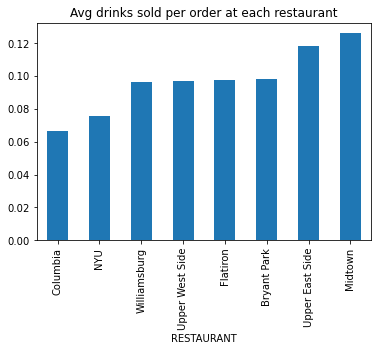

In [119]:
#Analyse the drinks sold across selected locations in NYC
#avg no. of drinks per order at each restaurant, sorted in ascending order
orders.groupby('RESTAURANT').DRINKS.mean().sort_values().plot(kind = 'bar')
plt.title('Avg drinks sold per order at each restaurant')

#### Looking at the above graph, the Upper East Side and Midtown would be potential places for the product launch.

Text(0.5, 1.0, 'Drinks sold each month in 2018')

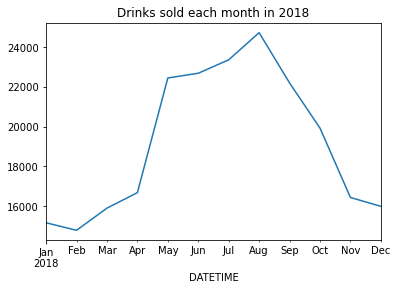

In [121]:
#Analyse when would be a good time for the product launch:
orders.set_index('DATETIME').resample('M').DRINKS.sum().plot() #resample from daily to month
plt.title('Drinks sold each month in 2018')
#the summer months

#### To analyse if the Upper East Side or Midtown restaurants, which sold the most drinks per order, also saw the highest drinks sold during the summer months.

Text(0.5, 1.0, 'Drinks sold by Selected Restaurants in the year')

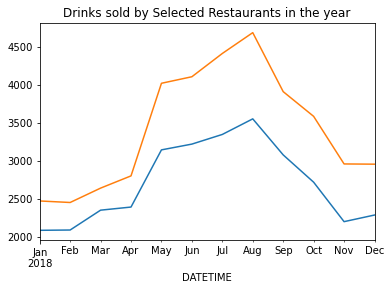

In [124]:
#For Upper East Side
orders[orders.RESTAURANT == 'Upper East Side'].set_index('DATETIME').resample('M').DRINKS.sum().plot()
#For Midtown
orders[orders.RESTAURANT == 'Midtown'].set_index('DATETIME').resample('M').DRINKS.sum().plot()
plt.title('Drinks sold by Selected Restaurants in the year')
#Yes, this seems to hold

#### Take a look at which mains and bases are the most popular 

Text(0.5, 1.0, 'Mains by Popularity')

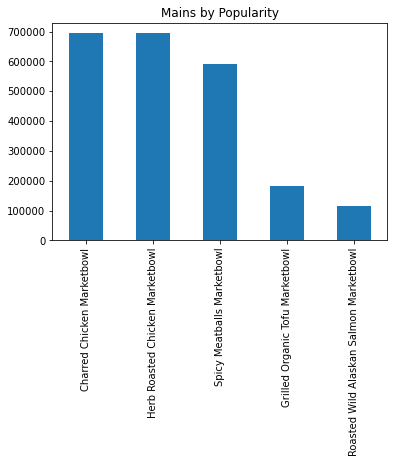

In [84]:
orders.MAIN_COURSE.value_counts().plot(kind='bar') 
#Charred Chicken Marketbowl the most popular. Meat is more popular than tofu or salmon.
plt.title('Mains by Popularity')

Text(0.5, 1.0, 'Base by Popularity')

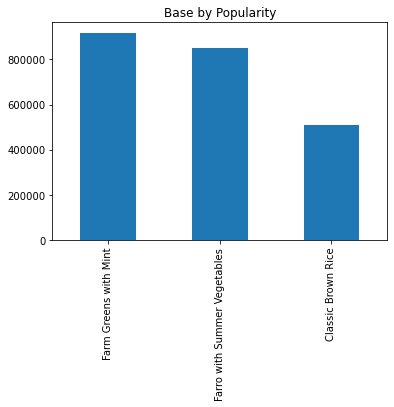

In [125]:
orders.BASE_COURSE.value_counts().plot(kind='bar')
plt.title('Base by Popularity')
#Farm Greens with Mint

In [96]:
orders.groupby(['MAIN_COURSE','BASE_COURSE']).size().sort_values(ascending=False).reset_index()
#the most popular mains and base combination -- 
#Herb Roasted Chicken Marketbowl and Farm Greens with Mint

,MAIN_COURSE,BASE_COURSE,0
0,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,280243
1,Charred Chicken Marketbowl,Farm Greens with Mint,279591
2,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,259056
3,Charred Chicken Marketbowl,Farro with Summer Vegetables,258945
4,Spicy Meatballs Marketbowl,Farm Greens with Mint,238509
5,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,220116
6,Charred Chicken Marketbowl,Classic Brown Rice,155311
7,Herb Roasted Chicken Marketbowl,Classic Brown Rice,154203
8,Spicy Meatballs Marketbowl,Classic Brown Rice,132060
9,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,73682


In [97]:
#Reordering the data to show the top combinations
orders.groupby(['MAIN_COURSE','BASE_COURSE']).size().unstack()

BASE_COURSE,Classic Brown Rice,Farm Greens with Mint,Farro with Summer Vegetables
MAIN_COURSE,,,
Charred Chicken Marketbowl,155311,279591,258945
Grilled Organic Tofu Marketbowl,41323,73682,68153
Herb Roasted Chicken Marketbowl,154203,280243,259056
Roasted Wild Alaskan Salmon Marketbowl,25616,46052,42779
Spicy Meatballs Marketbowl,132060,238509,220116


Text(0.5, 1.0, 'Combinations of Mains and Base by Order')

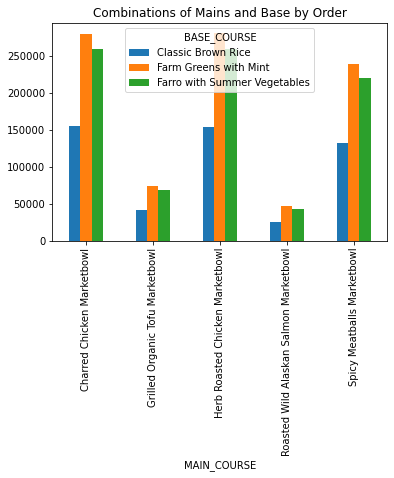

In [98]:
#Plot results of the combination
orders.groupby(['MAIN_COURSE','BASE_COURSE']).size().unstack().plot(kind = 'bar')
plt.title('Combinations of Mains and Base by Order')

#### Take a look at which two sides combinations are the most popular

Text(0.5, 1.0, 'Sides by Popularity')

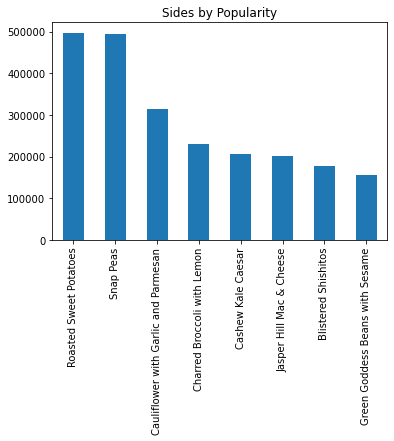

In [126]:
orders.SIDE_COURSE.value_counts().plot(kind = 'bar')
plt.title('Sides by Popularity')
#Roasted Sweet Potatoes and Snap Peas came up among the top.

<AxesSubplot:>

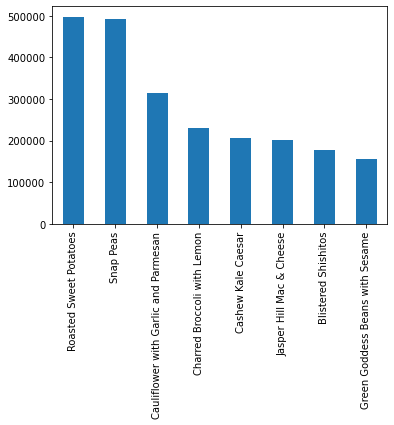

In [101]:
orders.SIDE_2_NAME.value_counts().plot(kind = 'bar')
#Roasted Sweet Potatoes and Snap Peas also came up among the top.

In [127]:
orders.groupby(['MAIN_COURSE','SIDE_COURSE']).size().sort_values(ascending=False).reset_index().head()
#the most popular combination is the Spicy Meatballs Marketbowl and Snap Peas

,MAIN_COURSE,SIDE_COURSE,0
0,Spicy Meatballs Marketbowl,Snap Peas,223313
1,Herb Roasted Chicken Marketbowl,Roasted Sweet Potatoes,207752
2,Herb Roasted Chicken Marketbowl,Cauliflower with Garlic and Parmesan,140162
3,Charred Chicken Marketbowl,Snap Peas,139594
4,Charred Chicken Marketbowl,Roasted Sweet Potatoes,123652


In [105]:
#Reordering the data to show the top combinations
orders.groupby(['MAIN_COURSE','SIDE_COURSE']).size().unstack()

SIDE_COURSE,Blistered Shishitos,Cashew Kale Caesar,Cauliflower with Garlic and Parmesan,Charred Broccoli with Lemon,Green Goddess Beans with Sesame,Jasper Hill Mac & Cheese,Roasted Sweet Potatoes,Snap Peas
MAIN_COURSE,,,,,,,,
Charred Chicken Marketbowl,82880,65554,76497,79569,51142,74959,123652,139594
Grilled Organic Tofu Marketbowl,10730,9776,35666,20838,15901,32607,21738,35902
Herb Roasted Chicken Marketbowl,27526,75584,140162,69200,49842,33524,207752,89912
Roasted Wild Alaskan Salmon Marketbowl,4614,7690,6611,21322,15774,18264,35647,4525
Spicy Meatballs Marketbowl,51172,48439,54873,39253,22197,42790,108648,223313


Text(0.5, 1.0, 'Combinations of Mains and Sides')

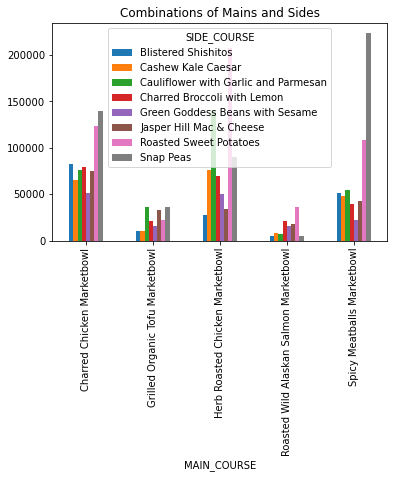

In [129]:
#Plot results of the combination
orders.groupby(['MAIN_COURSE','SIDE_COURSE']).size().unstack().plot(kind = 'bar')
plt.title('Combinations of Mains and Sides')
#the most popular combinations were the Herb Roasted Chicken Marketbowl x Roasted Sweet Potatoes
#and the Spicy Meatballs Marketbowl x Snap Peas

#### Identify when the restaurants operate at the peak

Text(0.5, 1.0, 'Orders by The Hour By Restaurant')

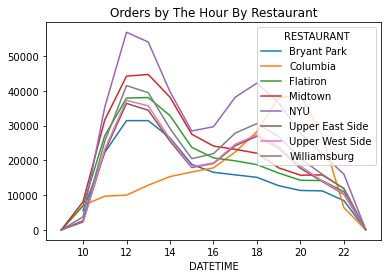

In [131]:
(orders.groupby([orders.DATETIME.dt.hour,
               orders.RESTAURANT])
.size()
.unstack()
.plot())
plt.title('Orders by The Hour By Restaurant')
#It is clear that the peaks are around lunchtime and dinnertime for most of the restaurants.
#Therefore, it is important that the restaurants continue to ensure that they are staffed 
#adequately according to the times when the orders are in high demand.

#### Analyse Healthier Options by Order

In [108]:
#Use a proxy to measure healthier options - by looking at the order type.
orders.BASE_COURSE.value_counts()

Farm Greens with Mint           918077
Farro with Summer Vegetables    849049
Classic Brown Rice              508513
Name: BASE_COURSE, dtype: int64

In [132]:
healthy = 'Farm Greens with Mint'
#one of the column is named COOKIES
print(orders[orders.BASE_COURSE != healthy].COOKIES.mean())
#customers who did not order salad ordered an avg 0.37 cookies per order
print(orders[orders.BASE_COURSE == healthy].COOKIES.mean())
#customers who ordered salad ordered an avg 0.088 cookies per order

0.3664534590480054
0.08817561054247083


Text(0.5, 1.0, 'What sides and base do the healthiest consumers tend to order?')

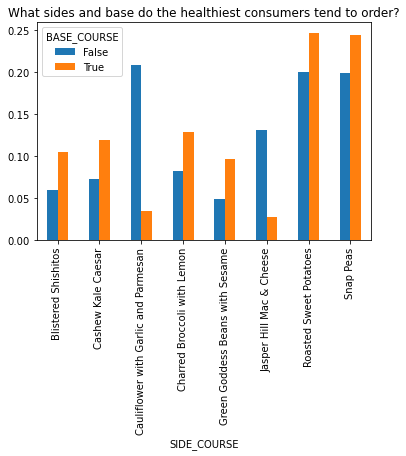

In [135]:
#Plot the combinations of the side and base
#compare the orders of healthy vs non-healthy consumers
(orders.groupby(orders.BASE_COURSE == healthy) #healthy vs non-healthy base
 .SIDE_COURSE
 .value_counts(normalize = True)
 .unstack(level = 0
         )
 .plot(kind = 'bar')
)
plt.title('What sides and base do the healthiest consumers tend to order?')
#roasted sweet potatoes and snap peas (Side_1_name) tend to go with healthy bases

In [136]:
#Adapted from Python For MBAs by Mattan Griffel and Daniel Guetta 